In [1]:
%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assignment 1: Web Server Log Analysis

Before we begin, make sure you have the following files:

    data/NASA_access_log_Jul95
    data/GeoIP.dat

## Part 1: Load and parse the data


For this part, you will load the data and store them in as a **list of python dictionaries**. Here are the first few lines of the log file.

```
199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] "GET /history/apollo/ HTTP/1.0" 200 6245
unicomp6.unicomp.net - - [01/Jul/1995:00:00:06 -0400] "GET /shuttle/countdown/ HTTP/1.0" 200 3985
199.120.110.21 - - [01/Jul/1995:00:00:09 -0400] "GET /shuttle/missions/sts-73/mission-sts-73.html HTTP/1.0" 200 4085
burger.letters.com - - [01/Jul/1995:00:00:11 -0400] "GET /shuttle/countdown/liftoff.html HTTP/1.0" 304 0
```

Below is an example formatting string and a short description of each element:
    
    format = r'%h %l %u %t \"%r\" %>s %b'
    
where

    %h          - remote host (ie the client IP)
    %l          - identity of the user determined by identd (not usually used since not reliable)
    %u          - user name determined by HTTP authentication
    %t          - time the server finished processing the request.
    %r          - request line from the client. ("GET / HTTP/1.0")
    %>s         - status code sent from the server to the client (200, 404 etc.)
    %b          - size of the response to the client (in bytes)
    

Remember we want the data to be a *list of dictionaries* as shown below:

    data = [
    {'%>s': '200',
     '%b': '6245',
     '%h': '199.72.81.55',
     '%l': '-',
     '%r': 'GET /history/apollo/ HTTP/1.0',
     '%t': '[01/Jul/1995:00:00:01 -0400]',
     '%u': '-'},
    {'%>s': '200',
     '%b': '3985',
     '%h': 'unicomp6.unicomp.net',
     '%l': '-',
     '%r': 'GET /shuttle/countdown/ HTTP/1.0',
     '%t': '[01/Jul/1995:00:00:06 -0400]',
     '%u': '-'},
     ...
    ]


### Remarks 
 - There are some log entries that are malformed. You may ignore them.
 - This Python package can be useful: `conda install -c auto apache-log-parser=1.3.0`
 

In [2]:
# Fill code here
import apache_log_parser

log_format = '%h %l %u %t \"%r\" %>s %b'
log_file = 'data/NASA_access_log_Jul95'
line_parser = apache_log_parser.make_parser(log_format)
data = []

with open(log_file, 'r') as f:
    for line in f:
        try:
            log_line_data = line_parser(line)
            data.append(log_line_data)
        except:
            continue


In [3]:
data[:2]

[{'remote_host': '199.72.81.55',
  'remote_logname': '-',
  'remote_user': '-',
  'request_first_line': 'GET /history/apollo/ HTTP/1.0',
  'request_http_ver': '1.0',
  'request_method': 'GET',
  'request_url': '/history/apollo/',
  'response_bytes_clf': '6245',
  'status': '200',
  'time_recieved': '[01/Jul/1995:00:00:01 -0400]',
  'time_recieved_datetimeobj': datetime.datetime(1995, 7, 1, 0, 0, 1),
  'time_recieved_isoformat': '1995-07-01T00:00:01'},
 {'remote_host': 'unicomp6.unicomp.net',
  'remote_logname': '-',
  'remote_user': '-',
  'request_first_line': 'GET /shuttle/countdown/ HTTP/1.0',
  'request_http_ver': '1.0',
  'request_method': 'GET',
  'request_url': '/shuttle/countdown/',
  'response_bytes_clf': '3985',
  'status': '200',
  'time_recieved': '[01/Jul/1995:00:00:06 -0400]',
  'time_recieved_datetimeobj': datetime.datetime(1995, 7, 1, 0, 0, 6),
  'time_recieved_isoformat': '1995-07-01T00:00:06'}]

In [7]:
# Expected output
data[:2]

[{'%>s': '200',
  '%b': '6245',
  '%h': '199.72.81.55',
  '%l': '-',
  '%r': 'GET /history/apollo/ HTTP/1.0',
  '%t': '01/Jul/1995 00:00:01 -0400',
  '%u': '-'},
 {'%>s': '200',
  '%b': '3985',
  '%h': 'unicomp6.unicomp.net',
  '%l': '-',
  '%r': 'GET /shuttle/countdown/ HTTP/1.0',
  '%t': '01/Jul/1995 00:00:06 -0400',
  '%u': '-'}]

## Part 2: Create the Data Frame

In this part, we will create a data frame from `data` and clean it up a little bit. First, create a data frame called `df` from `data`

In [4]:
# Fill code here
df = pd.DataFrame(data)

Now, show the first two line of `df`

In [5]:
# Fill code here
df[:2]

,remote_host,remote_logname,remote_user,request_first_line,request_http_ver,request_method,request_url,response_bytes_clf,status,time_recieved,time_recieved_datetimeobj,time_recieved_isoformat
0,199.72.81.55,-,-,GET /history/apollo/ HTTP/1.0,1.0,GET,/history/apollo/,6245,200,[01/Jul/1995:00:00:01 -0400],1995-07-01 00:00:01,1995-07-01T00:00:01
1,unicomp6.unicomp.net,-,-,GET /shuttle/countdown/ HTTP/1.0,1.0,GET,/shuttle/countdown/,3985,200,[01/Jul/1995:00:00:06 -0400],1995-07-01 00:00:06,1995-07-01T00:00:06


In [13]:
# Expected output

,Status,b,IP,%l,Request,Time,%u
0,200,6245,199.72.81.55,-,GET /history/apollo/ HTTP/1.0,01/Jul/1995 00:00:01 -0400,-
1,200,3985,unicomp6.unicomp.net,-,GET /shuttle/countdown/ HTTP/1.0,01/Jul/1995 00:00:06 -0400,-


Rename the columns to `Status`, `b`, `IP`, `Request`, and `Time`. Remove all other columns.

In [6]:
# Fill code here
df = df.rename(columns= {
    "status": "Status",
    "response_bytes_clf": "b", 
    "remote_host": "IP",
    "request_first_line": "Request",
    "time_recieved_datetimeobj": "Time"
})

In [7]:
head_columns = np.array(df.columns.values)
dropped_labels = head_columns[head_columns != 'Status']
dropped_labels = dropped_labels[dropped_labels != 'b']
dropped_labels = dropped_labels[dropped_labels != 'IP']
dropped_labels = dropped_labels[dropped_labels != 'Request']
dropped_labels = dropped_labels[dropped_labels != 'Time']

In [8]:
df = df.drop(dropped_labels, axis=1)
df[:5]

,IP,Request,b,Status,Time
0,199.72.81.55,GET /history/apollo/ HTTP/1.0,6245,200,1995-07-01 00:00:01
1,unicomp6.unicomp.net,GET /shuttle/countdown/ HTTP/1.0,3985,200,1995-07-01 00:00:06
2,199.120.110.21,GET /shuttle/missions/sts-73/mission-sts-73.ht...,4085,200,1995-07-01 00:00:09
3,burger.letters.com,GET /shuttle/countdown/liftoff.html HTTP/1.0,0,304,1995-07-01 00:00:11
4,199.120.110.21,GET /shuttle/missions/sts-73/sts-73-patch-smal...,4179,200,1995-07-01 00:00:11


In [16]:
# Expected output

,IP,Request,Status,Time,b
0,199.72.81.55,GET /history/apollo/ HTTP/1.0,200,01/Jul/1995 00:00:01 -0400,6245
1,unicomp6.unicomp.net,GET /shuttle/countdown/ HTTP/1.0,200,01/Jul/1995 00:00:06 -0400,3985
2,199.120.110.21,GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,01/Jul/1995 00:00:09 -0400,4085
3,burger.letters.com,GET /shuttle/countdown/liftoff.html HTTP/1.0,304,01/Jul/1995 00:00:11 -0400,0
4,199.120.110.21,GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,01/Jul/1995 00:00:11 -0400,4179


Next, Convert Time column to datetime format and make an index out of it. Use `pd.to_datetime()`

In [9]:
df['Time'] = pd.to_datetime(df['Time'])
df = df.set_index(df['Time'])
df = df.drop('Time', axis=1)
df[:5]

,IP,Request,b,Status
Time,,,,
1995-07-01 00:00:01,199.72.81.55,GET /history/apollo/ HTTP/1.0,6245,200
1995-07-01 00:00:06,unicomp6.unicomp.net,GET /shuttle/countdown/ HTTP/1.0,3985,200
1995-07-01 00:00:09,199.120.110.21,GET /shuttle/missions/sts-73/mission-sts-73.ht...,4085,200
1995-07-01 00:00:11,burger.letters.com,GET /shuttle/countdown/liftoff.html HTTP/1.0,0,304
1995-07-01 00:00:11,199.120.110.21,GET /shuttle/missions/sts-73/sts-73-patch-smal...,4179,200


Change `Status` variable to type `int`. Use `.astype()`

In [10]:
# Fill code here
df['Status'] = df['Status'].astype(int)

In [11]:
df.head()

,IP,Request,b,Status
Time,,,,
1995-07-01 00:00:01,199.72.81.55,GET /history/apollo/ HTTP/1.0,6245,200
1995-07-01 00:00:06,unicomp6.unicomp.net,GET /shuttle/countdown/ HTTP/1.0,3985,200
1995-07-01 00:00:09,199.120.110.21,GET /shuttle/missions/sts-73/mission-sts-73.ht...,4085,200
1995-07-01 00:00:11,burger.letters.com,GET /shuttle/countdown/liftoff.html HTTP/1.0,0,304
1995-07-01 00:00:11,199.120.110.21,GET /shuttle/missions/sts-73/sts-73-patch-smal...,4179,200


Your data frame should have the following format

In [32]:
# DO NOT CHANGE/RERUN
# df.head()

,Status,b,IP,Request
Time,,,,
1995-07-01 04:00:01,200,6245,199.72.81.55,GET /history/apollo/ HTTP/1.0
1995-07-01 04:00:06,200,3985,unicomp6.unicomp.net,GET /shuttle/countdown/ HTTP/1.0
1995-07-01 04:00:09,200,4085,199.120.110.21,GET /shuttle/missions/sts-73/mission-sts-73.ht...
1995-07-01 04:00:11,304,0,burger.letters.com,GET /shuttle/countdown/liftoff.html HTTP/1.0
1995-07-01 04:00:11,200,4179,199.120.110.21,GET /shuttle/missions/sts-73/sts-73-patch-smal...


Some of the rows in the *b* column contain '-' string, so we can't convert them with *astype*. We can apply a custom function to this column, that will convert all dashes to NaN, and the rest to floats, additionally converting from bytes to megabytes:

In [12]:
def dash2nan(x):
    if x == '-':
        x = np.nan
    else:
        x = float(x)/1048576.
    return x

Apply the above fuction to `b` column of `df`. Try using `.apply()`

In [13]:
# Fill code here
df['b'] = df['b'].apply(dash2nan)
df[:5]

,IP,Request,b,Status
Time,,,,
1995-07-01 00:00:01,199.72.81.55,GET /history/apollo/ HTTP/1.0,0.005956,200
1995-07-01 00:00:06,unicomp6.unicomp.net,GET /shuttle/countdown/ HTTP/1.0,0.003800,200
1995-07-01 00:00:09,199.120.110.21,GET /shuttle/missions/sts-73/mission-sts-73.ht...,0.003896,200
1995-07-01 00:00:11,burger.letters.com,GET /shuttle/countdown/liftoff.html HTTP/1.0,0.000000,304
1995-07-01 00:00:11,199.120.110.21,GET /shuttle/missions/sts-73/sts-73-patch-smal...,0.003985,200


Now our data frame is ready!

## Part 3: Traffic analysis

First, plot the response size over time from 9am to 10am on Jul 13, 1995. Similar to the following plot:

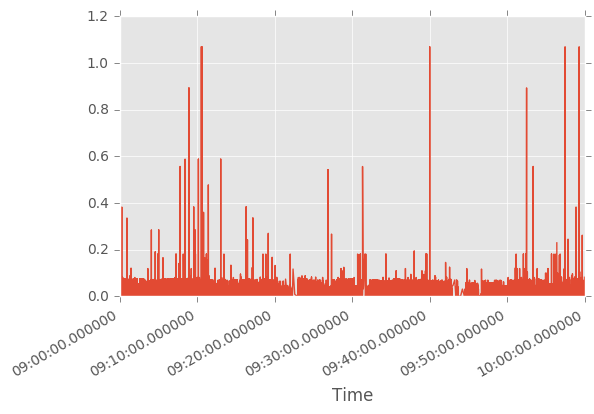

In [14]:
# Fill code here
start = '1995-07-13 09:00' <= df.index
end = df.index <= '1995-07-13 10:00'
plot_data = np.logical_and(start, end)
new_df = df[plot_data]
new_df.plot(y='b', legend=False)

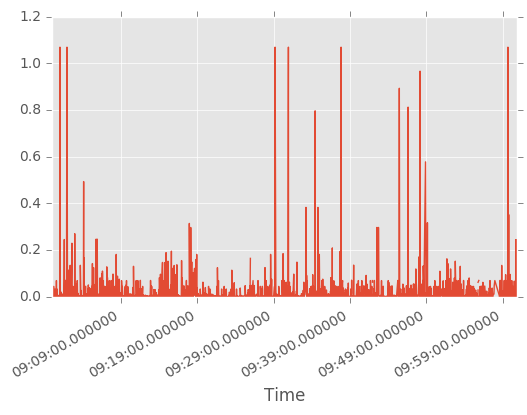

In [37]:
# Expected output

Next, use `.resample()` along with `.sum()` to resample the data and plot the traffic over time for all days. Use '10T' (every 10 minutes) as the sampling rate.

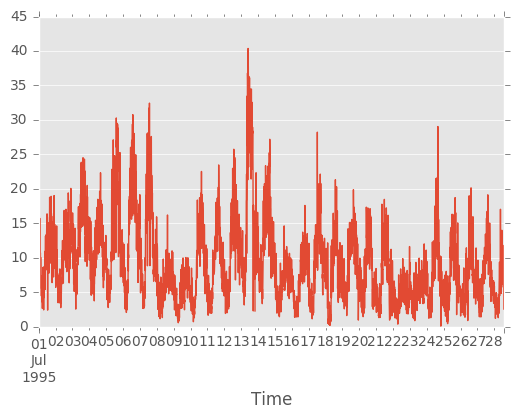

In [15]:
# Fill code here
resample_df = df.resample(rule='10T').sum()
resample_df.plot(y='b', legend=False)

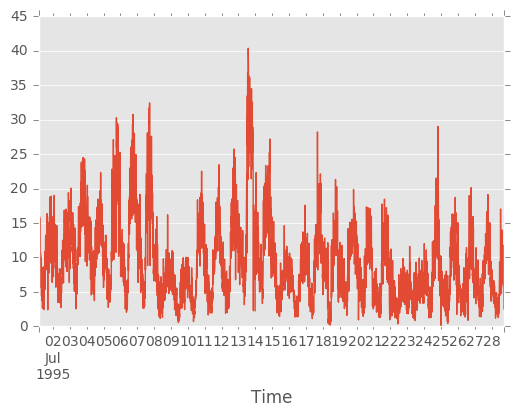

In [25]:
# Expected output

Now try to zoom into 13 Jul 1995.

(13426560, 13427999)

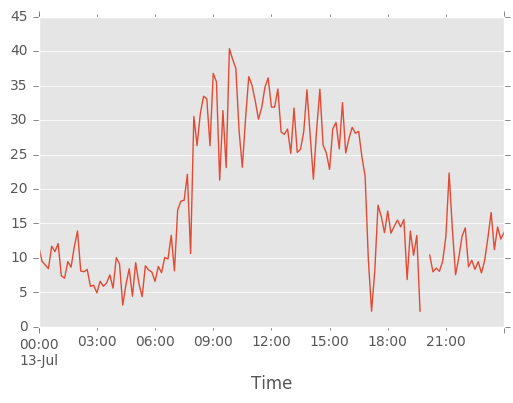

In [16]:
# Fill code here
ax = resample_df.plot(y='b', legend=False)
ax.set_xlim(pd.Timestamp('1995-07-13 00:00'), pd.Timestamp('1995-07-13 23:59'))

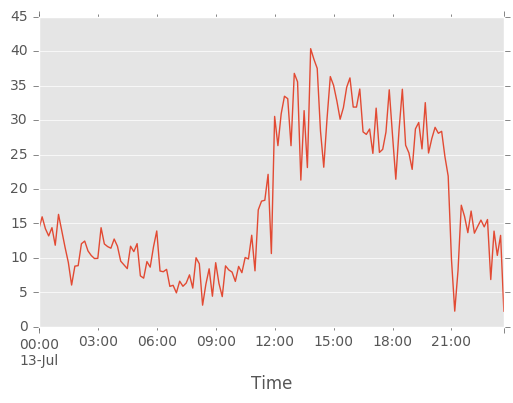

In [27]:
# Expected output

In [17]:
# Fill code here
df[df['b'] > 3]

,IP,Request,b,Status
Time,,,,
1995-07-07 10:28:56,spider.tbe.com,GET /statistics/1995/bkup/Mar95_full.html HTTP...,3.009318,200
1995-07-07 14:03:32,derec,GET /shuttle/countdown/video/livevideo.jpeg HT...,6.507812,200
1995-07-09 09:22:14,netspace.net.au,GET /statistics/1995/bkup/Mar95_full.html HTTP...,3.009318,200
1995-07-13 14:38:43,acf4.nyu.edu,GET /statistics/1995/bkup/Mar95_full.html HT...,3.009318,200
1995-07-14 09:11:29,163.206.89.4,GET /statistics/1995/bkup/Mar95_full.html HTTP...,3.009318,200
1995-07-17 13:31:01,jcj8363.dukepower.com,GET /statistics/1995/bkup/Mar95_full.html HT...,3.009318,200
1995-07-22 13:08:18,wuzza.harvard.edu,GET /statistics/1995/bkup/Mar95_full.html HT...,3.009318,200
1995-07-25 17:58:56,198.122.135.40,GET /statistics/1995/bkup/Mar95_full.html HT...,3.009318,200


Let's find out large requests. Show requests that has response biggger than 3MB.

In [28]:
# Expected output

,IP,Request,Status,b
Time,,,,
1995-07-07 14:28:56,spider.tbe.com,GET /statistics/1995/bkup/Mar95_full.html HTTP...,200,3.009318
1995-07-07 18:03:32,derec,GET /shuttle/countdown/video/livevideo.jpeg HT...,200,6.507812
1995-07-09 13:22:14,netspace.net.au,GET /statistics/1995/bkup/Mar95_full.html HTTP...,200,3.009318
1995-07-13 18:38:43,acf4.nyu.edu,GET /statistics/1995/bkup/Mar95_full.html HT...,200,3.009318
1995-07-14 13:11:29,163.206.89.4,GET /statistics/1995/bkup/Mar95_full.html HTTP...,200,3.009318
1995-07-17 17:31:01,jcj8363.dukepower.com,GET /statistics/1995/bkup/Mar95_full.html HT...,200,3.009318
1995-07-22 17:08:18,wuzza.harvard.edu,GET /statistics/1995/bkup/Mar95_full.html HT...,200,3.009318
1995-07-25 21:58:56,198.122.135.40,GET /statistics/1995/bkup/Mar95_full.html HT...,200,3.009318


what is the typical size of the server's response? Make a histogram of response sizes smaller than 3MB. Set number of bins to 10.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x19051de50>]], dtype=object)

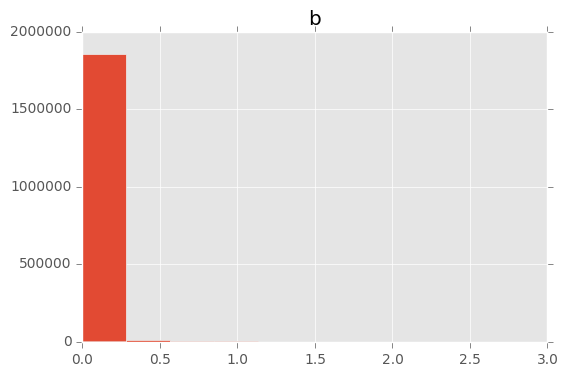

In [18]:
# Fill code here
response_df = df[df['b'] < 3]
response_df.hist(column='b', bins=10)

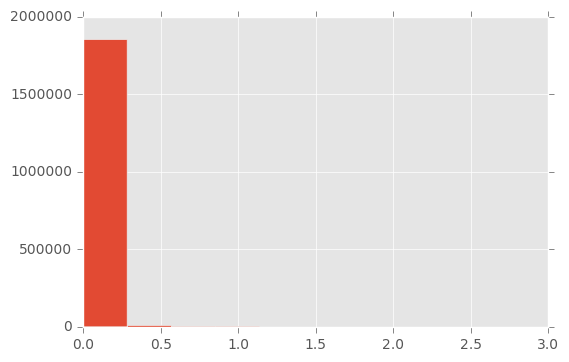

In [33]:
# Expected output

So most of the files are less than 0.5 MB large. In fact they are even smaller. Show a histogram of responses sizes smaller than 0.05 MB. Set number of bins to 30.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1905675d0>]], dtype=object)

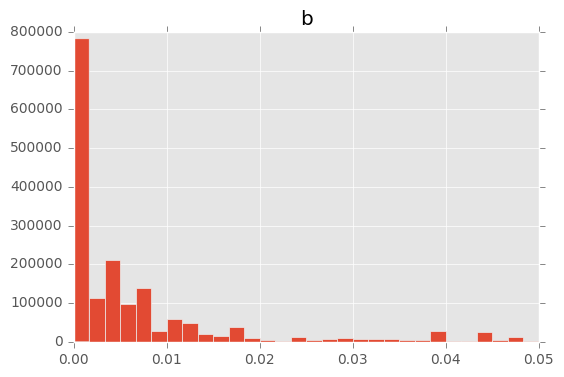

In [19]:
# Fill code here
response_df = df[df['b'] < 0.05]
response_df.hist(column='b', bins=30)

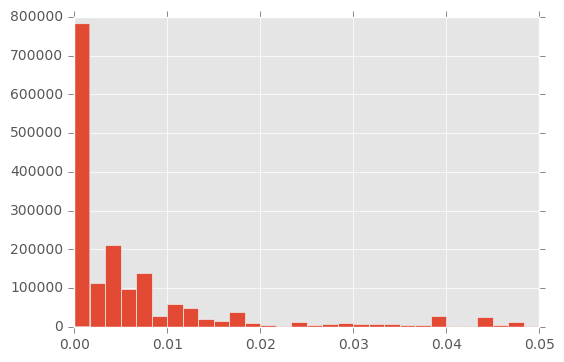

In [34]:
# Expected output

Very small responses can be all kinds of stuff, but larger ones are probably some relatively big files. Let's have a look at histogram of response sizes between 0.2 and 0.25 MB. Set number of bins to 100.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x155432b50>]], dtype=object)

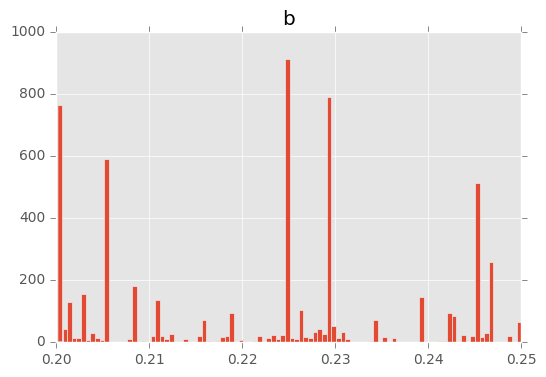

In [20]:
# Fill code here
start = df['b'] >= 0.2
end = df['b'] <= 0.25
filter_data = np.logical_and(start, end)
new_df = df[filter_data]
new_df.hist(column='b', bins=100)

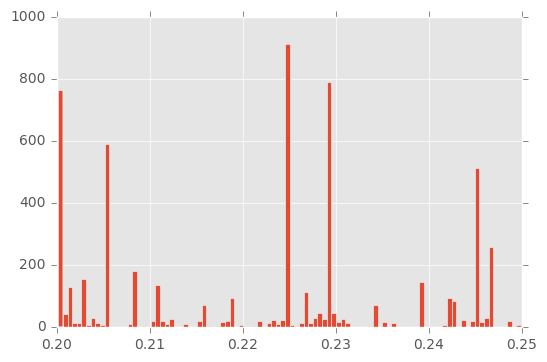

In [35]:
# Expected output

We now can locate the size of the file more precisely, and find out their names. Show the entries that have response size between 0.22 and 0.224 MB.

In [21]:
# Fill code here
start = df['b'] >= 0.22
end = df['b'] <= 0.224
filter_data = np.logical_and(start, end)
new_df = df[filter_data]
new_df[:5]

,IP,Request,b,Status
Time,,,,
1995-07-01 08:39:58,131.182.28.171,GET /shuttle/missions/sts-51/sts-51-patch.jpg ...,0.223356,200
1995-07-02 11:17:25,landon.iag.net,GET /news/sci.space.news/archive/sci-space-new...,0.223778,200
1995-07-02 15:14:26,www-d3.proxy.aol.com,GET /shuttle/missions/sts-50/sts-50-patch.jpg ...,0.223009,200
1995-07-02 15:20:21,www-d3.proxy.aol.com,GET /shuttle/missions/sts-51/sts-51-patch.jpg ...,0.223356,200
1995-07-03 00:45:50,atropos.jf.intel.com,GET /shuttle/missions/sts-51/sts-51-patch.jpg ...,0.223356,200


In [36]:
# Expected output

,IP,Request,Status,b
Time,,,,
1995-07-01 12:39:58,131.182.28.171,GET /shuttle/missions/sts-51/sts-51-patch.jpg ...,200,0.223356
1995-07-02 15:17:25,landon.iag.net,GET /news/sci.space.news/archive/sci-space-new...,200,0.223778
1995-07-02 19:14:26,www-d3.proxy.aol.com,GET /shuttle/missions/sts-50/sts-50-patch.jpg ...,200,0.223009
1995-07-02 19:20:21,www-d3.proxy.aol.com,GET /shuttle/missions/sts-51/sts-51-patch.jpg ...,200,0.223356
1995-07-03 04:45:50,atropos.jf.intel.com,GET /shuttle/missions/sts-51/sts-51-patch.jpg ...,200,0.223356


## Part 4 : Server status codes

I would like to know how different server responses are distributed through time. Create a new Data Frame that counts the number of requests per status in every 2 hour time spans.

```
HTTP Status Code
----------------
200 - OK
302 - Found
304 - Not Modified
400 - Bad Request
403 - Forbidden 
404 - Not Found
500 - Internal Server Error
501 - Not Implemented
```

In [ ]:
# Fill code here

In [44]:
# Expected output

,Bad Request,Forbidden,Found,Internal Server Error,Not Found,Not Implemented,Not Modified,OK
Time,,,,,,,,
1995-07-01 04:00:00,NaN,NaN,292,NaN,34,NaN,328,5915
1995-07-01 06:00:00,NaN,NaN,135,NaN,28,NaN,236,3603
1995-07-01 08:00:00,NaN,NaN,91,NaN,19,NaN,198,2517
1995-07-01 10:00:00,NaN,NaN,134,NaN,6,NaN,261,2684
1995-07-01 12:00:00,NaN,NaN,153,NaN,9,NaN,296,3565


We plot all values at once:

In [ ]:
# Fill code here

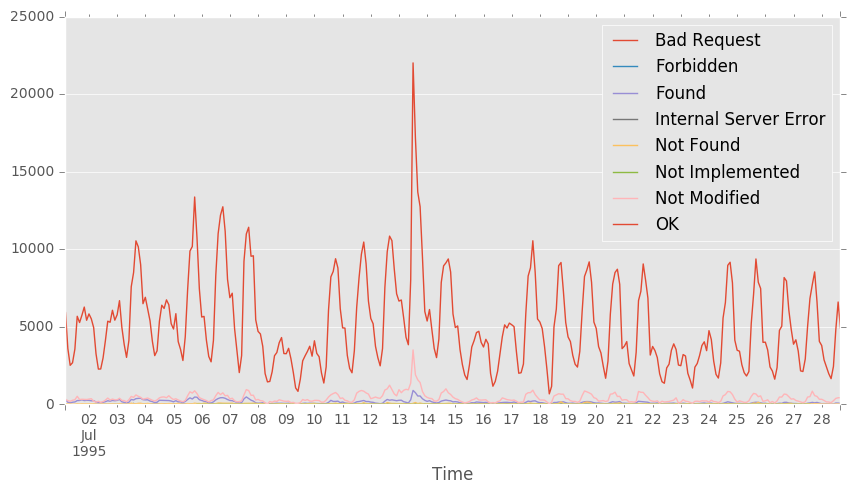

In [46]:
# Expected output

Show only Error and Redirection status codes as a stacked plot. You should show daily data. Use `.plot(kind='barh',stacked=True,figsize=(10,7))`

In [ ]:
# Fill code here

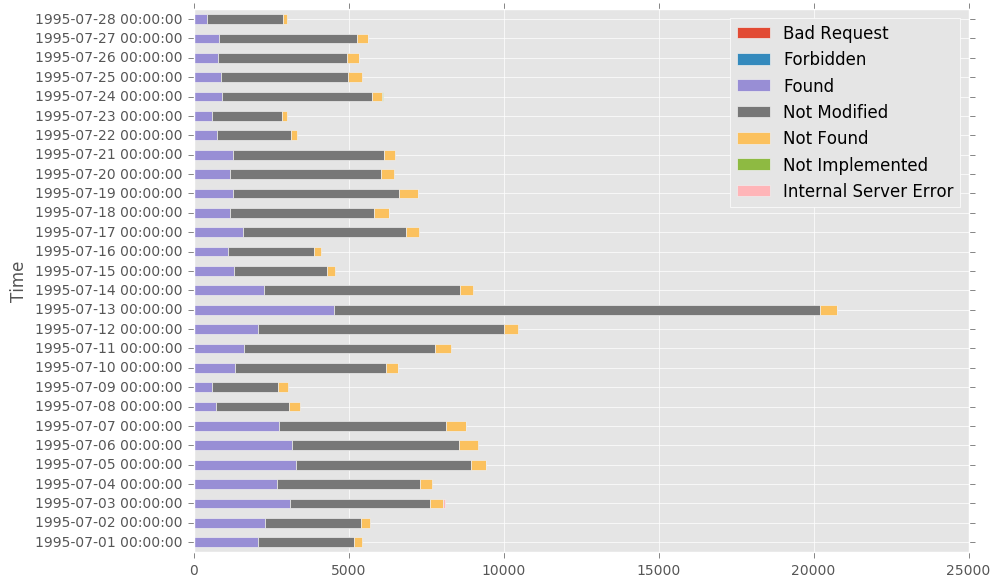

In [50]:
# Expected output

But there is a better way to receive statistics about different groups of values. Here we group our data by *Status* by using `.groupby()`

In [39]:
# Fill code here

Data are now rearranged in to several groups, each corresponding to a certain value of *Status* (here, only the first two values of every group are shown):

In [41]:
grouped_status.head(2)

,IP,Request,Status,b
Time,,,,
1995-07-01 04:00:01,199.72.81.55,GET /history/apollo/ HTTP/1.0,200,0.005956
1995-07-01 04:00:06,unicomp6.unicomp.net,GET /shuttle/countdown/ HTTP/1.0,200,0.003800
1995-07-01 04:00:11,burger.letters.com,GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0.000000
1995-07-01 04:00:12,burger.letters.com,GET /images/NASA-logosmall.gif HTTP/1.0,304,0.000000
1995-07-01 04:01:06,205.189.154.54,"GET /cgi-bin/imagemap/countdown?99,176 HTTP/1.0",302,0.000105
1995-07-01 04:01:12,dd15-062.compuserve.com,GET /news/sci.space.shuttle/archive/sci-space-...,404,NaN
1995-07-01 04:01:53,remote27.compusmart.ab.ca,"GET /cgi-bin/imagemap/countdown?102,174 HTTP/1.0",302,0.000105
1995-07-01 04:10:19,netport-27.iu.net,GET /pub/winvn/readme.txt HTTP/1.0,404,NaN
1995-07-02 04:55:38,pc0135.metrolink.net,GET /shuttle/missions/sts-71/images/images/eks...,403,NaN


We can count the number of values in each group:

In [ ]:
# Fill code here

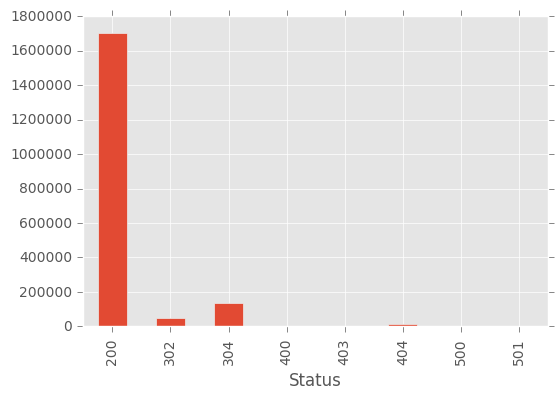

In [54]:
# Expected output

## Part 5 : IPs

Now I want to group by IPs and calculate how many requests we get from each of them: 

In [ ]:
# Fill code here

Show top 10 IPs and number of requests as a bar chart.

In [ ]:
# Fill code here

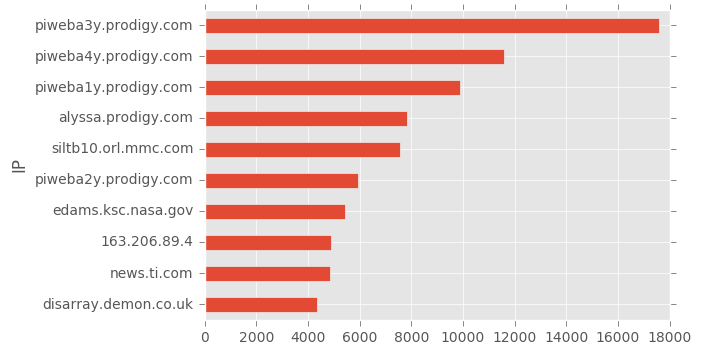

In [53]:
# Expected output

I just want to have a nice table with the top 10 IPs, so I convert them to Data Frame :)

In [ ]:
# Fill code here

In [55]:
# Expected output

,Number of requests
IP,
disarray.demon.co.uk,4353
news.ti.com,4863
163.206.89.4,4906
edams.ksc.nasa.gov,5434
piweba2y.prodigy.com,5922
siltb10.orl.mmc.com,7573
alyssa.prodigy.com,7852
piweba1y.prodigy.com,9868
piweba4y.prodigy.com,11591


We also can group by both *IP* and *Status*. Try and produce the bar chart as shown below.

In [ ]:
# Fill code here

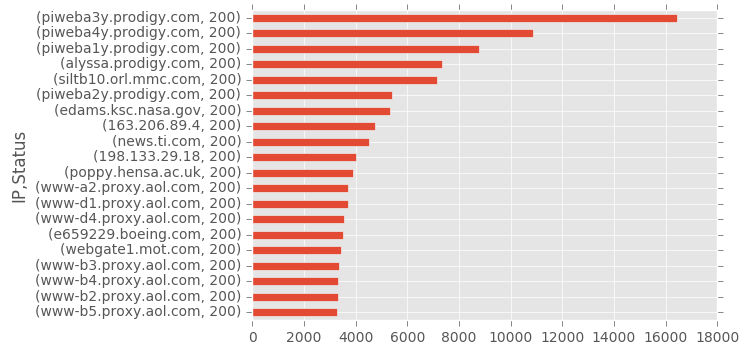

In [57]:
# Expected output

## Part 6: Geographical information

In this part, you will further analyze the log file by cross-checking the ip/hostname with GeoIP data. This will let you know the geographical origin of the request.

You will be 'pygeoip' package, which can be easily installed by `conda install -c chuongdo pygeoip=0.3.1`

In [60]:
import pygeoip
gi = pygeoip.GeoIP('data/GeoIP.dat', pygeoip.MEMORY_CACHE)

One of the challenges for this part is that some entries are not the IP addresses but hostnames. Here is excerpt from pygeoip API. You can use these function to get the country code.

```
country_code_by_addr(addr) -- Returns 2-letter country code (e.g. US) from IP address.
    Parameters:	addr – IP address (e.g. 203.0.113.30)

country_code_by_name(hostname) -- Returns 2-letter country code (e.g. US) from hostname.
    Parameters:	hostname – Hostname (e.g. example.com)
```

** Caution: Looking up IP addresses can be extremely slow. It's okay to do this on a subset of data **

In [ ]:
# Fill code here

Create Data Frame similar to what shown below

In [ ]:
# Fill code here

In [73]:
# Expected output

,code,number
IP,,
b10rn101.remote.ingr.com,UNKNOWN,1
194.21.12.40,IT,1
ccas-slip2.saicyt.net.ve,UNKNOWN,1
stanton-1-1.cloverleaf.com,UNKNOWN,1
kosh-141b.berkeley.edu,UNKNOWN,1


Group by country code:

In [74]:
# Fill code here

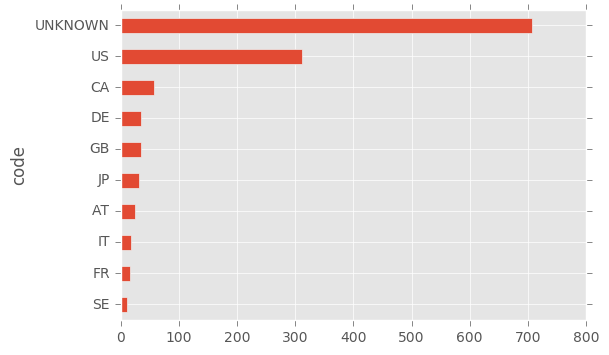

In [75]:
# Expected output

Credit: This exercise is based on a notebook by Nikolay Koldunov [koldunov.net](http://koldunov.net)